In last few files, we explored the following machine learning models in depth:

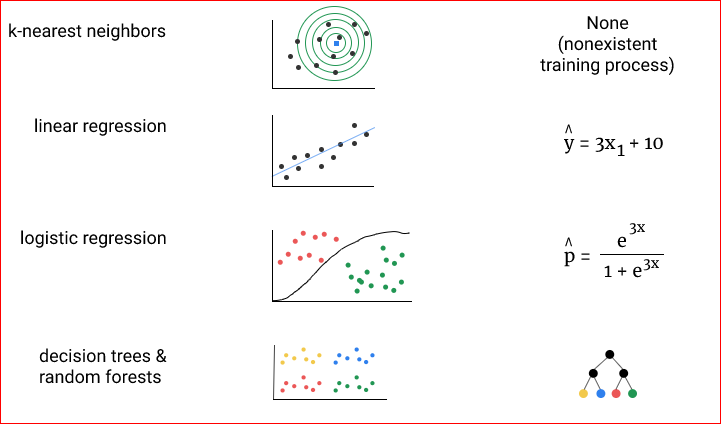

Because these are all supervised machine learning models, we repeated a similar process when using each model:
    
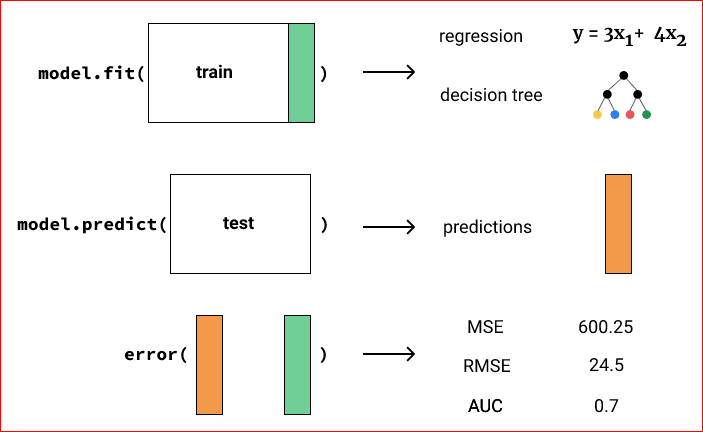

# Artificial neural networks
Artificial neural networks (or neural networks for short) draw some inspiration from biological neural networks, which describe how the cells in most brains (including ours) are connected and how they work together. 
* Each cell in a neural network is called a **neuron** and is connected to multiple neurons. Neurons in human (and mammalian) brains communicate by sending electrical signals between each other.

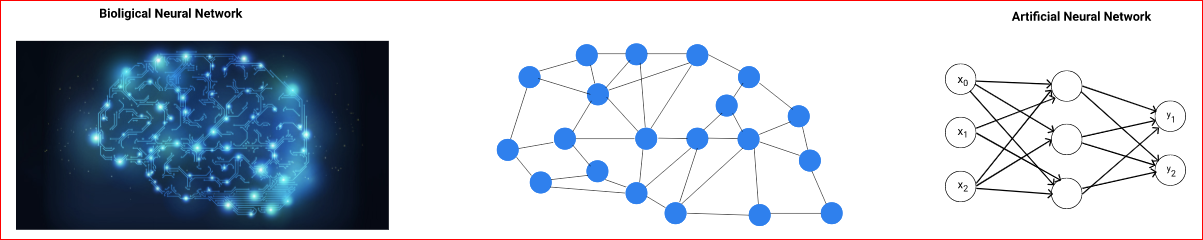

Neural network models were inspired by the structure of neurons in our brain and message passing between neurons, but the similarities between how biological neural networks and artificial neural networks end here.

A **deep neural network** is a specific type of neural network that excels at capturing nonlinear relationships in data. Deep neural networks have broken many benchmarks in **audio** and **image** classification. Previously, linear models were often used with nonlinear transformations that were discovered by hand through research.

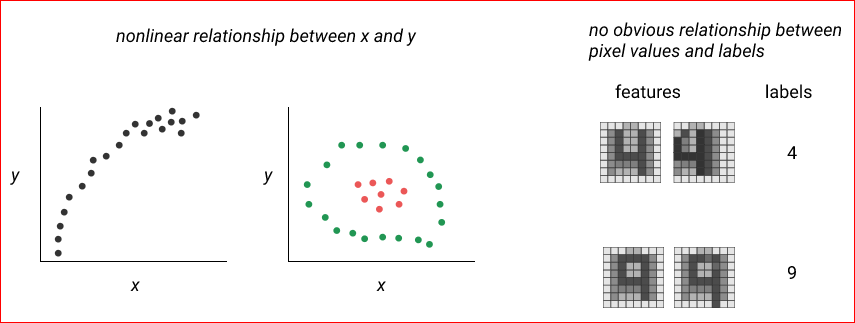

Deep neural networks have some ability to discover how to structure the nonlinear transformations during the training process automatically and have grown to become a helpful tool for many problems.

In this project, we'll focus on becoming familiar with how neural networks are represented and how to represent linear regression and logistic regression models in that representation.

Neural networks are usually represented as **graphs**. A graph is a data structure that consists of **nodes** (represented as circles) that are connected by **edges** (represented as lines).

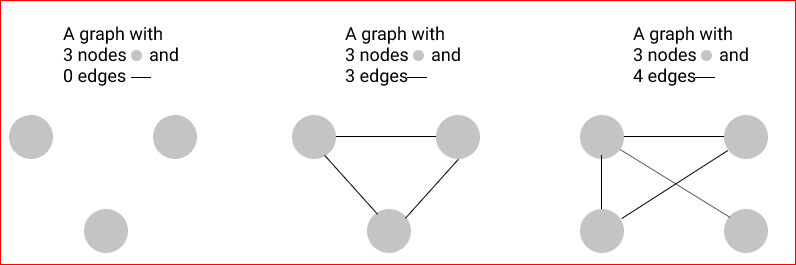

Graphs are commonly used to represent how components of a system are related or linked. For example, the [Facebook Social Graph](https://en.wikipedia.org/wiki/Social_graph) describes how all of the users on Facebook are connected to each other (and this graph is changing constantly as friends are added and removed). Google Maps uses graphs to represent locations in the physical world as nodes and roads as edges.

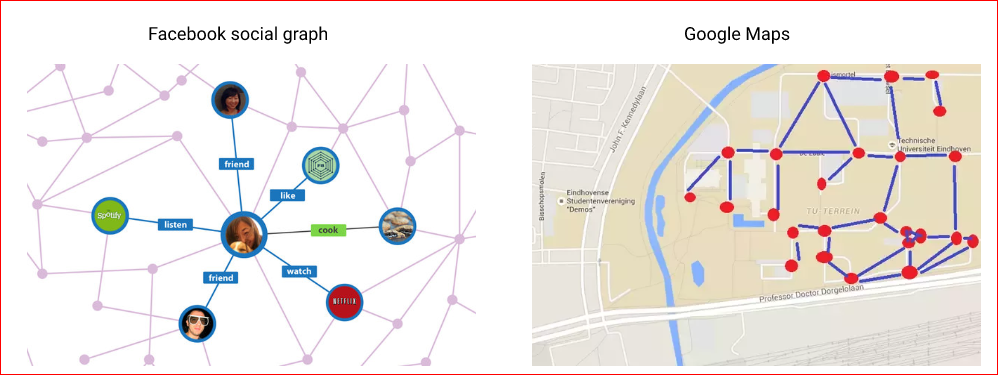

Graphs are a highly flexible data structure; we can even represent a list of values as a graph. Graphs are often categorized by their properties, which act as constraints.

One way graphs can be categorized is the presence of edge direction

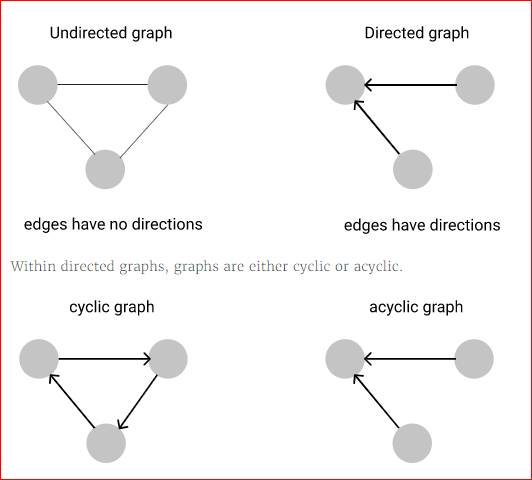

Graphs provide a mental model for thinking and reasoning about a specific class of models -- those that consist of a series of functions that are executed in a specific order. In the context of neural networks, graphs let us compactly express a pipeline of functions that we want to be executed in succession.

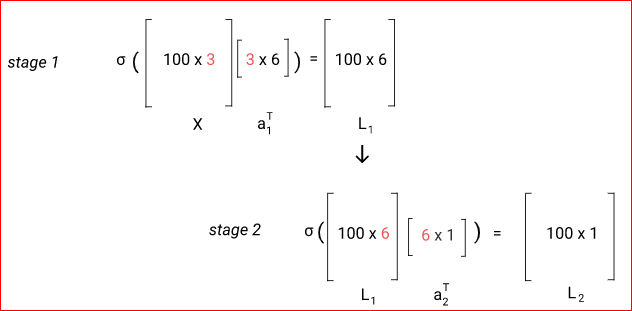

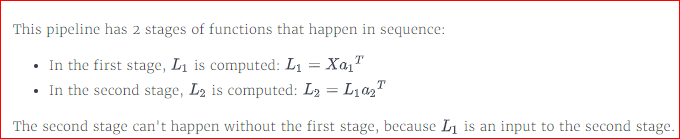

As we'll learn in this file, at the heart of neural network models is the successive computation of functions. This is known as a **computational graph**. A computational graph uses nodes to describe variables and edges to describe how variables are combined. Here's a simple example:

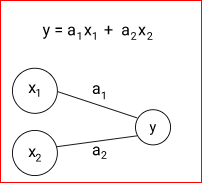

The computational graph is a powerful representation, as it allows us to compactly represent models with many layers of nesting. In fact, a decision tree is really a specific type of computational graph. There's no compact way to express a decision tree model using just equations and standard algebraic notation.

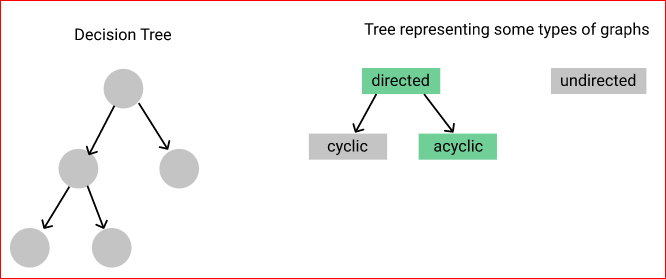

To get more familiar with this representation, we'll represent a linear regression model using neural network notation. This will help us get more comfortable with this unique representation and allow us to explore some of the neural network terminology as well.

If we recall, a linear regression model is represented as:

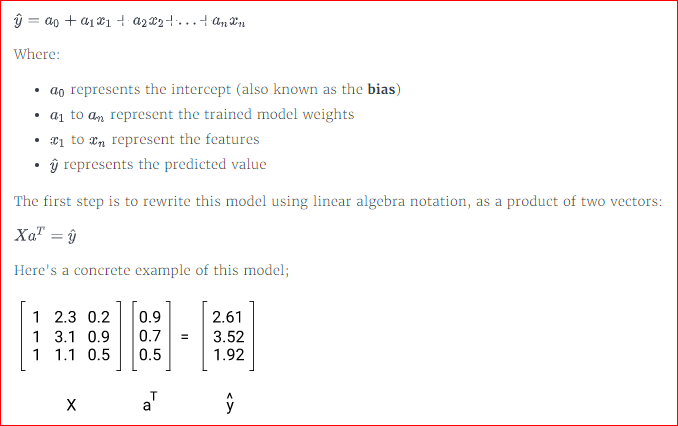

**Neural Network Representation**

In the neural network representation of this model:

* feature column in a data set is represented as an input neuron
* each weight value is represented as an arrow from the feature column it multiples to the output neuron

The neurons and arrows act as a visual metaphor for the weighted sum, which is how the feature columns and weights are combined.

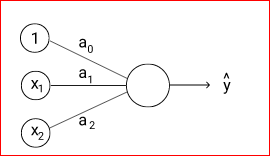

Inspired by biological neural networks, an **activation function** determines if the neuron fires or not. In a neural network model, the activation function transforms the weighted sum of the input values. For this network, the activation function is the [identity function](https://en.wikipedia.org/wiki/Identity_function). The identity function returns the same value that was passed in:

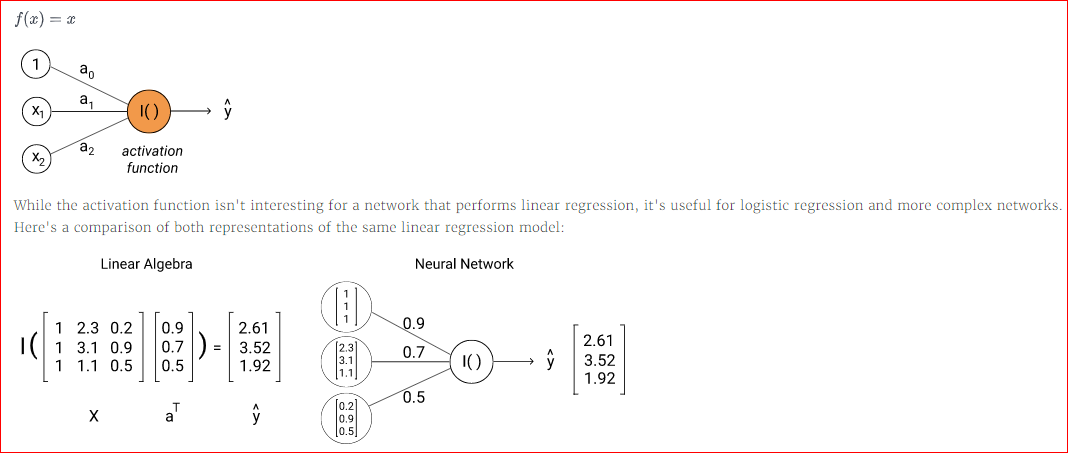

In this file and next, we'll work with data that we'll generate ourselves, instead of an external data set. Generating data ourselves gives us more control of the properties of the data set (e.g. like **the number of features**, **observations**, and **the noise in the features**). Data sets where neural networks excel contain the same non-linearity, so we can generalize the learnings to real data sets as well.

Scikit-learn contains the following convenience functions for generating data:

* [sklearn.datasets.make_regression()](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)
* [sklearn.datasets.make_classification()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)
* [sklearn.datasets.make_moons()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)

The following codes generates a regression data set with `3 features`, `100 observations`, and a `random seed` of `1`:

In [19]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

data = make_regression(n_samples=100, n_features=3, random_state=1)

The function `make_regression()` returns a tuple of two NumPy objects. The features are stored in the first NumPy array and the labels in the second NumPy array. We can then use the `pandas.DataFrame()` constructor to create dataframes:

In [20]:
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

Because the inputs from one layer of neurons feed to the next layer of the single, output neuron, this is known as a [feedforward network](https://en.wikipedia.org/wiki/Feedforward_neural_network). In the language of graphs, a feedforward network is a **directed, acyclic graph**.

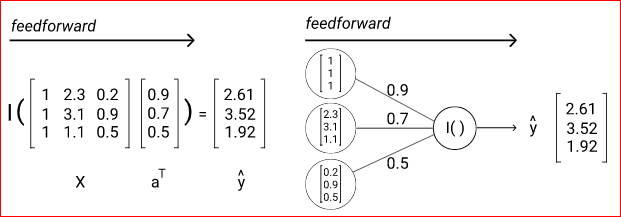

There are some neural network architectures that don't follow this pattern, but we won't be exploring those in this project.

### Fitting A Network

In the Linear Regression for Machine Learning, we explored two different approaches to training a linear regression model:   
1. gradient descent and 
2. ordinary least squares. 

Gradient descent is the most common technique for fitting neural network models. Because we've implemented gradient descent before in the Linear Regression for Machine Learning project, we'll rely on the scikit-learn implementation of gradient descent in this project.

This implementation lives in the [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) class. **SGD** stands for **Stochastic Gradient Descent**. We use it the same way we do with the `LinearRegression` class:

In [21]:
from sklearn.linear_model import SGDRegressor

In [22]:
# Add a bias column containing the value 1 for each row named "bias" to the features dataframe.
features["bias"] = 1

In [23]:
def train(features, labels):
    lr = SGDRegressor()
    lr.fit(features, labels)
    weights = lr.coef_
    return weights

In [1]:
def feedforward(features, weights):
    
    predictions = np.dot(features, weights.T)
    return predictions   

In [25]:
train_weights = train(features, labels)
linear_predictions = feedforward(features, train_weights)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


To generate a data set friendly for classification, we can use the `make_classification()` function from **scikit-learn**. The following codes generates a classification data set with `4 features`, `100 observations`, and a `random seed of 1`:

In [27]:
from sklearn.datasets import make_classification
class_data = make_classification(n_samples=100, n_features=4, random_state=1)
class_features = pd.DataFrame(class_data[0])
class_labels = pd.Series(class_data[1])

In the last few cells, we replicated **linear regression** as a **feedforward neural network model** and learned about nonlinear activation functions. We now have a better idea of what defines a neural network. So far, we know that neural networks need:

* a network structure (how are the nodes connected? which direction does the data and computation flow?)
* a feedforward function (how are the node weights and observation values combined?)
* an activation function (what transformations on the data are performed?)
* a model fitting function (how is the model fit?)

We'll now explore how to build a neural network that replicates a **logistic regression model**. We'll start with a quick recap.

### Binary Classification and Logistic Regression

In binary classification, we're interested in finding a model that can differentiate between two categorical values (usually `0` and `1` are used). The values `0` and `1` don't have any numerical weight and are instead act as numerical placeholders for the two categories. We can instead try to learn the probability that a given observation belongs in either category.

In the language of conditional probability, we're interested in the probability that a given observation `x` belongs to each category:

`P(y=0∣x)=0.3`

`P(y=1∣x)=0.7`

Because the universe of possibilities only consists of these two categories, the probabilities for both must add up to `1`. This lets us simplify what we want a binary classification model to learn:

`P(y=1∣x)=?`

* If `P(y=1∣x)>0.5`, we want the model to assign it to category `1`. 
* If `P(y=1∣x)<0.5`, we want the model to assign it to category `0`.

### Implementing A Logistic Regression Model

A logistic regression model consists of two main components:

* Computing the weighted linear combination of weights and features (just like in a linear regression model): `XaT`
* Applying a transformation function to squash the result so it varies between `0` and `1`: `σ(XaT)`

Combining these two steps yields the following definition of a logistic regression model:
ˆ
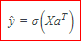

In neural networks literature, this function is usually referred to as the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function):


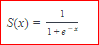

Here's a plot of the sigmoid function:

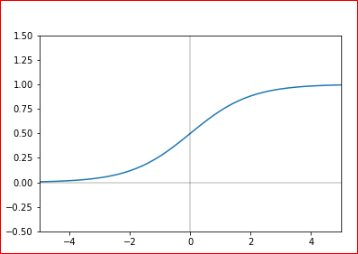

We will notice that the sigmoid function has horizontal asymptotes at `0` and `1`, which means any input value will always output a value between `0` and `1`.

To implement a network that performs classification, the only thing we need to change from the linear regression network we implemented is the **activation function**. Instead of using the **identity function**, we need to use the **sigmoid function**.


Here's a diagram of this network:

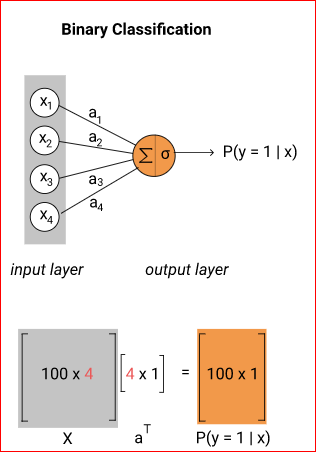

In [29]:
class_features["bias"] = 1

In [30]:
def log_train(class_features, class_labels):
    sg = SGDRegressor()
    sg.fit(class_features, class_labels)
    return sg.coef_

In [31]:
def sigmoid(linear_combination):
    return 1/(1+np.exp(-linear_combination))

In [32]:
def log_feedforward(class_features, log_train_weights):
    linear_combination = np.dot(class_features,log_train_weights.T)
    log_prediction = sigmoid(linear_combination)
    log_prediction[log_prediction>=0.5] = 1
    log_prediction[log_prediction<0.5] = 0
    return log_prediction

In [33]:
log_train_weights = log_train(class_features, class_labels)
log_predictions = log_feedforward(class_features, log_train_weights)   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In this project, we learned about:

* representing systems of equations as graphs
* the different components of a neural network
* how to represent linear and logistic regression models as graphs